In [17]:
# ================================================================
# TASK 1: CHOOSE WHICH CLEANED DATASET TO USE
# ================================================================

# Options:
# "cleaned_student-mat.csv"
# "cleaned_student-por.csv"

DATASET = "cleaned_student-mat.csv"

import pandas as pd
df = pd.read_csv(DATASET)

print("Loaded:", DATASET)
df.head()

Loaded: cleaned_student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [ ]:
# ================================================================
# TASK 2: SPLIT INTO FEATURES (X) AND TARGET (y) — USE G1 ONLY
# ================================================================

# Target: passed column (created in Task 1)
y = df["passed"]

# Remove target + G2 + G3 (to avoid leakage)
columns_to_drop = ["passed", "G2", "G3"]

# Drop safely even if some columns don’t exist
columns_to_drop = [c for c in columns_to_drop if c in df.columns]

X = df.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)
print("X shape:", X.shape)


Dropped columns: ['passed', 'G2', 'G3']
X shape: (395, 31)


In [ ]:
# ================================================================
# TASK 3: ONE-HOT ENCODE CATEGORICAL COLUMNS
# ================================================================

X = pd.get_dummies(X, drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [ ]:
# ================================================================
# TASK 4: TRAIN/TEST SPLIT
# ================================================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (316, 40) Test: (79, 40)


In [ ]:
# ================================================================
# TASK 5: TRAIN LOGISTIC REGRESSION
# ================================================================

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

print("Model trained.")


Model trained.


In [ ]:
# ================================================================
# TASK 6: MODEL EVALUATION (ACCURACY + REPORT)
# ================================================================

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7974683544303798

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.86      0.83      0.85        53

    accuracy                           0.80        79
   macro avg       0.77      0.78      0.77        79
weighted avg       0.80      0.80      0.80        79



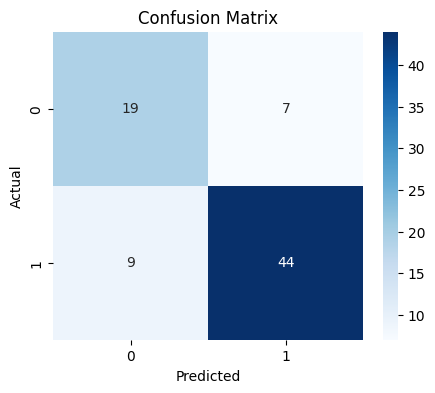

In [ ]:
# ================================================================
# TASK 7: CONFUSION MATRIX
# ================================================================

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
